In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Keywords

- Normal distribution / standard normal distribution
- t-distribution
- Confidence interval
- population mean / population proportion
- t-statistic / z-statistic

# [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)

- Gaussian distribution with 2 parameters: mean and variance.
- Symmetric distribution whose meam, mmedian, and mode are the same.
- Formula:
$$
    f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\bigl({-\frac{1}{2}}\bigl(\frac{x-\mu}{\sigma} \bigr)^2  \bigr)},
$$
where &mu; is the mean of the distribution, &sigma; is the standard deviation.  Here, &mu; can be median or mode as well.
- The variance of the distribution is &sigma;<sup>2</sup>.
- The normal distribution is important because of the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

See [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html) and [scipy.stats.norm](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)

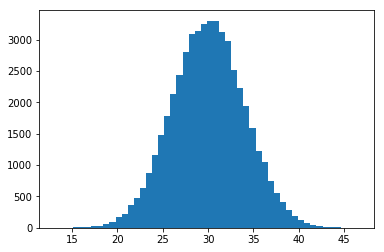

obtained mean = 30.02 / exact mean = 30.00
obtained median = 30.02 / exact median = 30.00
obtained variance = 16.02 / exact mean = 16.00


In [33]:
mu, sigma = 30, 4 # mean and standard deviation
num_samples=50000

np.random.seed(1)
s = np.random.normal(mu, sigma, num_samples) # generate random numbers that follow normal distribution
plt.hist(s,bins=50)
plt.show()

print("obtained mean = %0.2f / exact mean = %0.2f"%(np.mean(s),mu))
print("obtained median = %0.2f / exact median = %0.2f"%(np.median(s),mu))
print("obtained variance = %0.2f / exact mean = %0.2f"%(np.var(s),sigma**2))

# [Standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution)

- The simplest case of the normal distribution (mean = 0, standard deviation = 1).

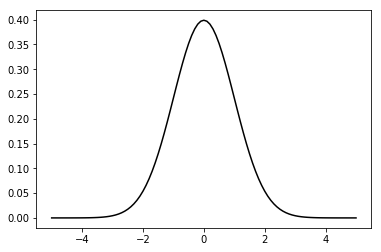

In [3]:
def standard_norm_pdf(x): 
    return np.exp(-0.5 * x**2 )/np.sqrt(2*np.pi)

x = np.linspace(-5,5,101)
plt.plot(x,standard_norm_pdf(x), 'k')
plt.show()

# [t-distribution (student's t-distribution)](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

## Features

- This is used to calculate the condidence intervals and do hypothesis testing.
- This distribution has one shape parameter called [degree of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)).
- As the degree of freedom increases, the t-distribution becomes closer to the standard normal distribution.

[scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)

## Visualization

Probability density function (pdf) is visualized. See also [scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).


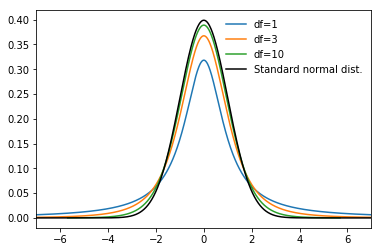

In [53]:
from scipy.stats import t

df_list=[1,3,10] # list of the degree of freedom

for j in range(len(df_list)):
    df=df_list[j]
    x = np.linspace(t.ppf(0.0001, df), t.ppf(0.9999, df), 500000)
    plt.plot(x, t.pdf(x, df), label='df=%d'%df)
    
x = np.linspace(-10,10,1001)
plt.plot(x,standard_norm_pdf(x), 'k', label='Standard normal dist.') # standard normal distribution

plt.legend(frameon = False)
plt.xlim([-7,7])
plt.show()

## Useful commands

### Percent point function - Find the point where you can get specific probability.

You can use <strong>percent point function (ppf)</strong>. If you want to find the point which gives the probability of 0.1 with the specific degree of freedom, df, you can type:
`t.ppf(0.1, df)`

See also [scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)

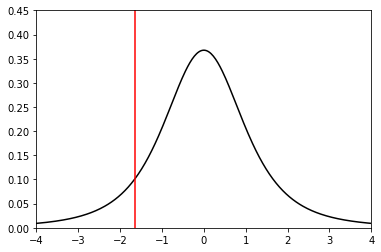

In [5]:
df=3

x = np.linspace(-4, 4, 300)
y = t.pdf(x, df)
plt.plot(x, y, 'k')
plt.plot(np.array([t.ppf(0.1,df),t.ppf(0.1,df)]),np.array([0,1]),color='red')

plt.xlim([-4,4])
plt.ylim([0,0.45])
plt.show()

In [6]:
print("Comparison for the percent point function for the probabilities of 0.1 and 0.9.")
print("0.1 probability: ",t.ppf(0.1,df))
print("0.9 probability: ",t.ppf(0.9,df))
print("These results show that the t-distribution is symmetric.")

Comparison for the percent point function for the probabilities of 0.1 and 0.9.
0.1 probability:  -1.6377443572159065
0.9 probability:  1.637744357215907
These results show that the t-distribution is symmetric.


### Cumulative density function - Find the probability of a specific point.

You can use <strong>cumulative density function (cdf)</strong>. If you want to find the probability at the point of -1, you can type:
`t.cdf(-0.1, df)`

See also [scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)

In [7]:
t.cdf(-1, df)

0.19550110947788527

The percent cumulative density function is the inverse of the cumulative density function.

In [9]:
print("cdf at x = -1: %0.3f"%t.cdf(-1, df))
print("ppf of cdf (exact value = -1): %0.3f"%t.ppf(t.cdf(-1, df) , df))

cdf at x = -1: 0.196
ppf of cdf (exact value = -1): -1.000


# [Confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for population mean

## Example

Let us assume that we want to know the average starting salary of all STEM students who graduated last year in Switzerland. Idealy, it is nice to ask all of the STEM students. However, it is almost impossible. Instead of asking all of the STEM students, we can randomly select n students to make a sample.

- Population: all STEM students in Switzerland who graduated last year. Mean = &mu;, Std = &sigma;
- Sample: random sample of n students. Mean = x_bar, Std = s.

The confidence interval shows the lower and upper limit of the population mean &mu; with the chosen confidence level (%).


## z-statistic

### General concept

According to the central limit theorem, the distribution of the sample mean is described by the normal distribution with N(&mu;, &sigma; (n)<sup>-1/2</sup>):
$$
    \bar{x} = N\biggl(\mu,\frac{\sigma}{\sqrt{n}}\biggr)
$$
This relation can be rewritten as
$$
    \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} = N(0,1).
$$
Here,
$$
    \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}
$$
is the z-statistic and equal to the standard normal distribution. As you can see, <strong>the z-statistic contains the population standard deviation &sigma;</strong>. 

A (1-&alpha;) confidence interval for the population mean &mu; is given by
$$
    \bar{x}-|z_{\alpha/2}|\frac{\sigma}{\sqrt{n}} < \mu < \bar{x}+|z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}
$$
Here, 
$$
    |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}
$$
is the margin of error, and &alpha; is the probability outside the confidence level.

### Calculation example
Let us calculate the 85 % confidence interval for the population mean &mu;. Let us assume that the population standard deviation is &sigma; = 10 and that the number of samples is n = 20. The sample mean x_bar is 70.

In [36]:
from scipy.stats import norm

alpha=0.15
sigma = 10
n = 20

z = norm.ppf(0.5*alpha) 
print("|Z_alpha/2| = %0.3f"%np.abs(z))

me= np.abs(z) * sigma / np.sqrt(n)  # margin of error
print("Lower limit: %0.3f"%(70-me))
print("Upper limit: %0.3f"%(70+me))
print("\nA %0.1f %% confidence interval for the population mean is: \n %0.2f < mu < %0.2f"%((1-alpha)*100,70-me,70+me))

|Z_alpha/2| = 1.440
Lower limit: 66.781
Upper limit: 73.219

A 85.0 % confidence interval for the population mean is: 
 66.78 < mu < 73.22


Let us caluclate the confidence intervals for different confidence levels.

In [37]:
sigma = 10
n = 20

alpha_list=[0.15,0.05, 0.01] # 85, 95, and 99 % confidence interval

for j in range(len(alpha_list)):
    alpha = alpha_list[j]
    z = norm.ppf(0.5*alpha) 
    me= np.abs(z) * sigma / np.sqrt(n)  # margin of error
    print("\nA %0.1f %% confidence interval for the population mean is: \n %0.2f < mu < %0.2f"%((1-alpha)*100,70-me,70+me))


A 85.0 % confidence interval for the population mean is: 
 66.78 < mu < 73.22

A 95.0 % confidence interval for the population mean is: 
 65.62 < mu < 74.38

A 99.0 % confidence interval for the population mean is: 
 64.24 < mu < 75.76


If the lower and upper limits become infinite, a 100 % confidence interval can be achieved.

## Size calculation

In some cases, it is necessary to determine the required size n to get a specific confidence interval. Let us assume the following conditions:
- Margin of error: +/- 0.3 
- Confidence level: 95 % (this is a commonly used setting)
- Population standard deviation: 0.9

Recall that the margin of error can be written as
$$
    ME = |z_{\alpha/2}|\frac{\sigma}{\sqrt{n}}.
$$
From this equation, we can get
$$
    n = \biggl(|z_{\alpha/2}|\frac{\sigma}{ME}\biggr)^2.
$$

In [120]:
alpha=0.05
sigma = 0.9 # population standard deviation
me = 0.3 # margin of error 

z = norm.ppf(0.5*alpha) # z-statistc

n = (np.abs(z) * sigma / me )**2
print("In order to get the specified confidence interval with 95 %% confidence level, %0.1f samples are needed."%n)

In order to get the specified confidence interval with 95 % confidence level, 34.6 samples are needed.


## t-statistic
### Gemeral concept
When the population standard deviation &sigma; is not available, we replace &sigma and z-statistic (z<sub>&alpha;/2</sub>) by sample standard deviation s and t-statistic (t<sub>&alpha;/2</sub>), respectively.  

A (1-&alpha;) confidence interval for the population mean &mu; is given by
$$
    \bar{x}-|t_{\alpha/2}|\frac{s}{\sqrt{n}} < \mu < \bar{x}+|t_{\alpha/2}|\frac{s}{\sqrt{n}}.
$$

The t-statistic |t<sub>&alpha;/2</sub>| can be calculated by percent position function (ppf):   
`scipy.stats.t.ppf(alpha/2, df=n-1)`

### Calculation example

In [100]:
from scipy.stats import t
 
alpha=0.15 
n = 20 # number of samples
s=10 # sample standard deviation

t_statistic = t.ppf(0.5*alpha, df=n-1) # t-statistic
print("|t_alpha/2| = %0.3f"%np.abs(t_statistic))

me= np.abs(t_statistic) * s / np.sqrt(n)  # margin of error
print("Lower limit: %0.3f"%(70-me))
print("Upper limit: %0.3f"%(70+me))
print("\nA %0.1f %% confidence interval for the population mean is: \n %0.2f < mu < %0.2f"%((1-alpha)*100,70-me,70+me))

|t_alpha/2| = 1.500
Lower limit: 66.645
Upper limit: 73.355

A 85.0 % confidence interval for the population mean is: 
 66.65 < mu < 73.35


# Confidence interval for population proportion
## General concept
A (1-&alpha;) confidence interval for the population proportion p is given by
$$
    \hat{p}-|z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} < p < \hat{p}+|z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} 
$$
Here, p and p_hat are the population proportion and the sample proportion from our sample, respectively. Only z-statistic is defined.

Let us calculate a 90 % confidence interval for an example. The number of sample data is 210. The sample proportion is 51 %.

In [105]:
from scipy.stats import norm

alpha=0.1
n = 210
p_hat=0.51

z = norm.ppf(0.5*alpha) 
print("|Z_alpha/2| = %0.3f"%np.abs(z))

me= np.abs(z) * np.sqrt(p_hat*(1-p_hat)/n)  # margin of error
print("Lower limit: %0.3f"%(p_hat-me))
print("Upper limit: %0.3f"%(p_hat+me))
print("\nA %0.1f %% confidence interval for the population mean is: \n %0.3f < p < %0.3f"%((1-alpha)*100,p_hat-me,p_hat+me))

|Z_alpha/2| = 1.645
Lower limit: 0.453
Upper limit: 0.567

A 90.0 % confidence interval for the population mean is: 
 0.453 < p < 0.567


## Size calculation
The margin of error is 
$$
    ME = |z_{\alpha/2}|\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}.
$$
From this equation, we can get 
$$
    n = |z_{\alpha/2}|^2\frac{\hat{p}(1-\hat{p})}{ME^2}.
$$
We can determine the z-statistic and margin of error. However, we cannot know p_hat until we start investigation. Because of this reason, we can make a conservative estimate. In the equation above, n is proportional to
$$
    \hat{p}(1-\hat{p}).
$$
This factor takes the largest value when p_hat = 0.5. In the conservative estimate, p_hat = 0.5 is used.